# Value Weighted Index

to calculate value weighted index we need to get the number of the marketcap and the last price to get the number of share outstandings 

In [126]:
import pandas as pd 
import numpy as np 
import yfinance 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
yfinance.pdr_override()
plt.style.use('fivethirtyeight')

## Getting the number of share outstanding

In [127]:
wb.get_quote_yahoo('BBCA.jk')[['sharesOutstanding']]

,sharesOutstanding
BBCA.JK,123275001856


## Loop Over all tickers to create the index & marketcap table

In [128]:
tickers = ['BFIN.jk', 'ADMF.jk', 'MFIN.jk', 'WOMF.jk', 'IMJS.jk']
lease = pd.DataFrame()
shares = {}

In [129]:
for ticker in tickers : 
    lease[ticker] = wb.get_data_yahoo(ticker, start = '2015-01-01', end = '2023-04-17')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [130]:
lease.head()

,BFIN.jk,ADMF.jk,MFIN.jk,WOMF.jk,IMJS.jk
Date,,,,,
2015-01-02,255.0,7175.0,497.5,189.574509,580.0
2015-01-05,240.0,7175.0,470.0,177.552719,575.0
2015-01-06,240.0,7125.0,470.0,189.574509,595.0
2015-01-07,240.0,7125.0,470.0,188.649750,580.0
2015-01-08,240.0,7125.0,470.0,188.649750,585.0


### Create normalized Price for leasing industry

In [158]:
norm_lease =  lease/lease.iloc[0] * 100
norm_lease

,BFIN.jk,ADMF.jk,MFIN.jk,WOMF.jk,IMJS.jk
Date,,,,,
2015-01-02,100.000000,100.000000,100.000000,100.000000,100.000000
2015-01-05,94.117647,100.000000,94.472362,93.658541,99.137931
2015-01-06,94.117647,99.303136,94.472362,100.000000,102.586207
2015-01-07,94.117647,99.303136,94.472362,99.512192,100.000000
2015-01-08,94.117647,99.303136,94.472362,99.512192,100.862069
...,...,...,...,...,...
2023-04-10,535.294118,147.038328,391.959799,159.304119,60.344828
2023-04-11,535.294118,147.038328,381.909548,155.084142,63.448276
2023-04-12,531.372549,148.083624,383.919598,154.029148,66.206897


### Create Initial Value Weighted Index 

In [160]:
norm_lease['VWI'] = 100
norm_lease.head()

,BFIN.jk,ADMF.jk,MFIN.jk,WOMF.jk,IMJS.jk,VWI
Date,,,,,,
2015-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100
2015-01-05,94.117647,100.000000,94.472362,93.658541,99.137931,100
2015-01-06,94.117647,99.303136,94.472362,100.000000,102.586207,100
2015-01-07,94.117647,99.303136,94.472362,99.512192,100.000000,100
2015-01-08,94.117647,99.303136,94.472362,99.512192,100.862069,100


### Getting Total Shares Outstanding & MarketCap Data

In [131]:
for ticker in tickers : 
    stock = yfinance.Ticker(ticker)
    data = stock.info
    shares[ticker]= [data['sharesOutstanding'], data['marketCap']]
    

In [132]:
shares = pd.DataFrame.from_dict(shares, orient='index', columns=['shares_outstanding','market_cap'])
shares.head()

,shares_outstanding,market_cap
BFIN.jk,15039399936,19852007833600
ADMF.jk,1000000000,10124999524352
MFIN.jk,2649999872,5114499694592
WOMF.jk,3481479936,1037481017344
IMJS.jk,8654319616,3461727911936


## Create Daily Marketcap Movement

In [133]:
mcap = lease.mul(shares['shares_outstanding'], axis = 'columns')
mcap.head()

,BFIN.jk,ADMF.jk,MFIN.jk,WOMF.jk,IMJS.jk
Date,,,,,
2015-01-02,3.835047e+12,7.175000e+12,1.318375e+12,6.599998e+11,5.019505e+12
2015-01-05,3.609456e+12,7.175000e+12,1.245500e+12,6.181462e+11,4.976234e+12
2015-01-06,3.609456e+12,7.125000e+12,1.245500e+12,6.599998e+11,5.149320e+12
2015-01-07,3.609456e+12,7.125000e+12,1.245500e+12,6.567803e+11,5.019505e+12
2015-01-08,3.609456e+12,7.125000e+12,1.245500e+12,6.567803e+11,5.062777e+12


In [134]:
mcap.tail()

,BFIN.jk,ADMF.jk,MFIN.jk,WOMF.jk,IMJS.jk
Date,,,,,
2023-04-10,2.052878e+13,1.055000e+13,5.167500e+12,1.051407e+12,3.029012e+12
2023-04-11,2.052878e+13,1.055000e+13,5.035000e+12,1.023555e+12,3.184790e+12
2023-04-12,2.037839e+13,1.062500e+13,5.061500e+12,1.016592e+12,3.323259e+12
2023-04-13,2.022799e+13,1.057500e+13,5.114500e+12,1.009629e+12,3.340567e+12
2023-04-14,1.977681e+13,9.925000e+12,5.114500e+12,1.002666e+12,3.202098e+12


### Visualizing Marketcap Movement 

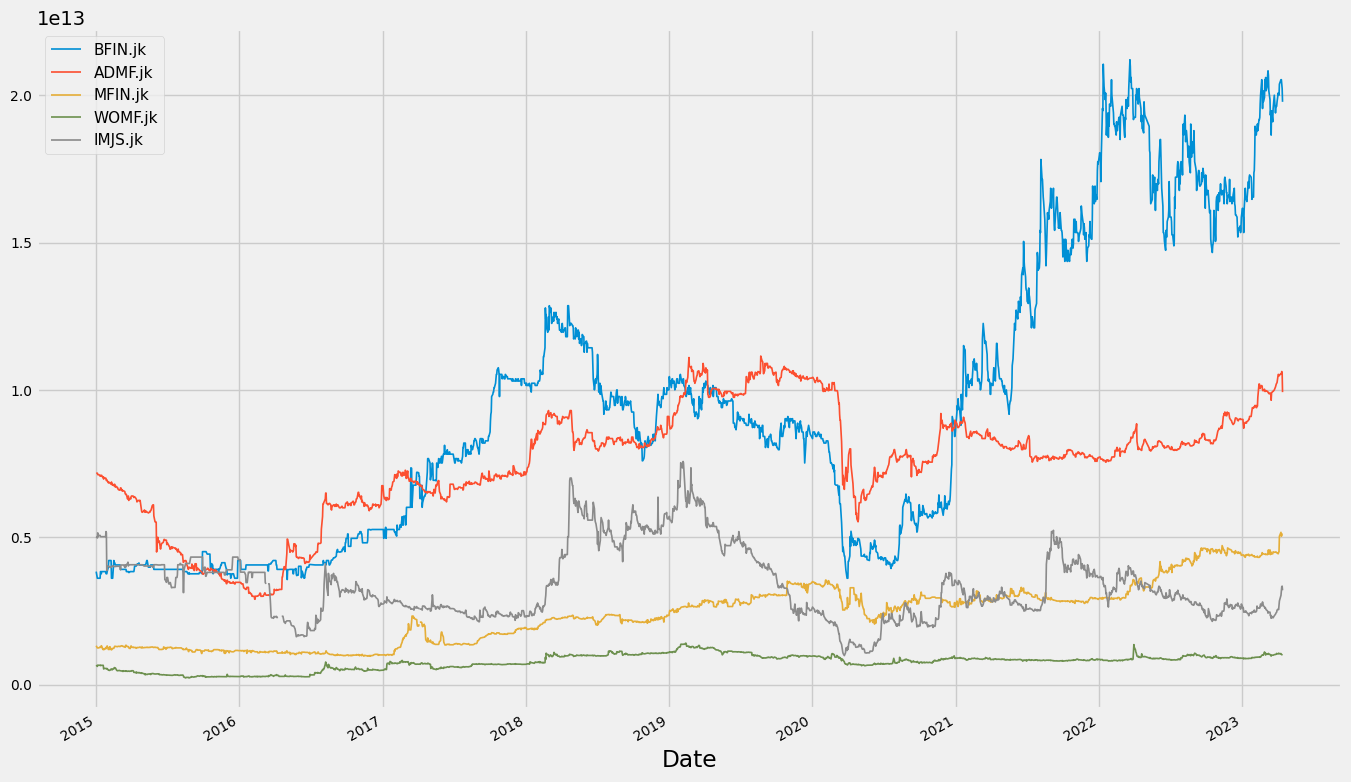

In [135]:
mcap.plot(figsize = (15,10), fontsize = 10, linewidth = 1.2)
plt.legend(fontsize = 11)
plt.show()

### Marketcap Movement Comparison With Stock Prices Movement

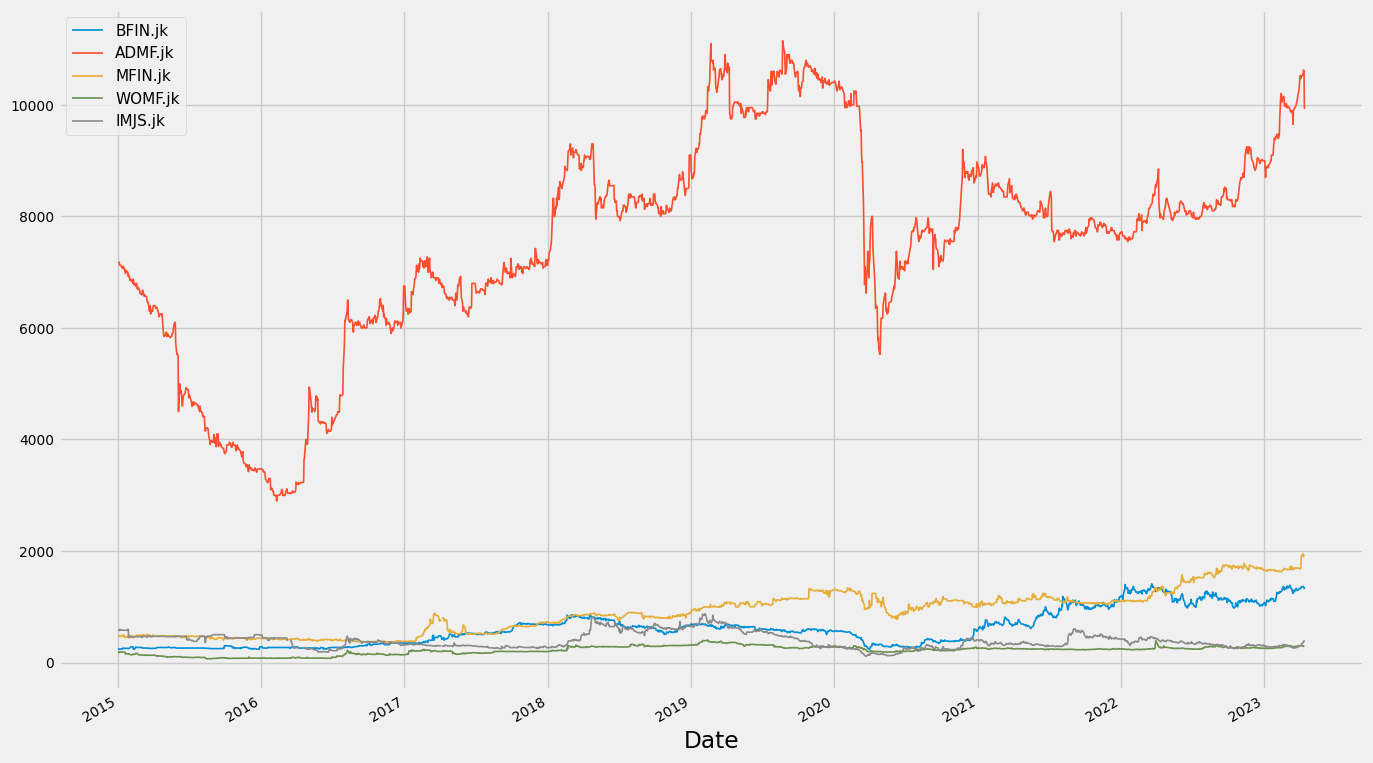

In [136]:
lease.plot(figsize = (15,10), fontsize = 10, linewidth = 1.2)
plt.legend(fontsize = 11)
plt.show()

## Creating Value Weighted Index

### Getting The total of Daily Market Cap 

In [139]:
mcap.sum(axis = 1)

Date
2015-01-02    1.800793e+13
2015-01-05    1.762434e+13
2015-01-06    1.778928e+13
2015-01-07    1.765624e+13
2015-01-08    1.769951e+13
                  ...     
2023-04-10    4.032670e+13
2023-04-11    4.032213e+13
2023-04-12    4.040474e+13
2023-04-13    4.026769e+13
2023-04-14    3.902108e+13
Length: 2069, dtype: float64

### Getting The Weight of Each Stock 

In [141]:
weigth_vwi = mcap.div(mcap.sum(axis = 1), axis = 'index')
weigth_vwi

,BFIN.jk,ADMF.jk,MFIN.jk,WOMF.jk,IMJS.jk
Date,,,,,
2015-01-02,0.212964,0.398436,0.073211,0.036651,0.278739
2015-01-05,0.204800,0.407108,0.070669,0.035073,0.282350
2015-01-06,0.202901,0.400522,0.070014,0.037101,0.289462
2015-01-07,0.204429,0.403540,0.070542,0.037198,0.284291
2015-01-08,0.203930,0.402553,0.070369,0.037107,0.286040
...,...,...,...,...,...
2023-04-10,0.509062,0.261613,0.128141,0.026072,0.075112
2023-04-11,0.509120,0.261643,0.124869,0.025384,0.078984
2023-04-12,0.504356,0.262964,0.125270,0.025160,0.082249


### Visualizing Weight Overtime in VWI 

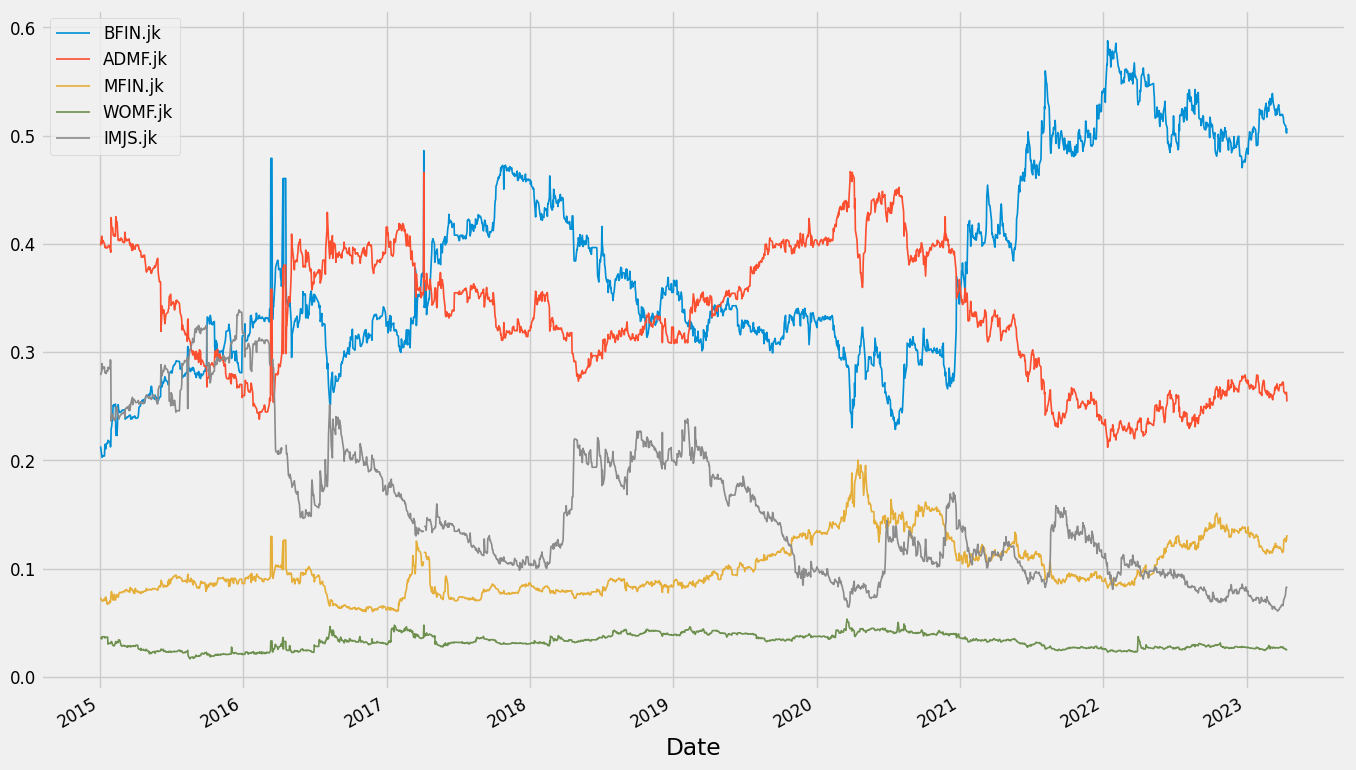

In [143]:
weigth_vwi.plot(figsize =(15,10), fontsize = 12, linewidth = 1.2)
plt.legend(fontsize = 12)
plt.show()

### Calculating pct_change of stock price & weigth

In [144]:
ret = lease.pct_change().dropna()
ret

,BFIN.jk,ADMF.jk,MFIN.jk,WOMF.jk,IMJS.jk
Date,,,,,
2015-01-05,-0.058824,0.000000,-0.055276,-0.063415,-0.008621
2015-01-06,0.000000,-0.006969,0.000000,0.067708,0.034783
2015-01-07,0.000000,0.000000,0.000000,-0.004878,-0.025210
2015-01-08,0.000000,0.000000,0.000000,0.000000,0.008621
2015-01-09,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
2023-04-10,0.007380,0.004762,0.026316,0.006667,0.067073
2023-04-11,0.000000,0.000000,-0.025641,-0.026490,0.051429
2023-04-12,-0.007326,0.007109,0.005263,-0.006803,0.043478


In [147]:
weigth_vwi.shift().dropna()

,BFIN.jk,ADMF.jk,MFIN.jk,WOMF.jk,IMJS.jk
Date,,,,,
2015-01-05,0.212964,0.398436,0.073211,0.036651,0.278739
2015-01-06,0.204800,0.407108,0.070669,0.035073,0.282350
2015-01-07,0.202901,0.400522,0.070014,0.037101,0.289462
2015-01-08,0.204429,0.403540,0.070542,0.037198,0.284291
2015-01-09,0.203930,0.402553,0.070369,0.037107,0.286040
...,...,...,...,...,...
2023-04-10,0.512065,0.263843,0.126519,0.026245,0.071328
2023-04-11,0.509062,0.261613,0.128141,0.026072,0.075112
2023-04-12,0.509120,0.261643,0.124869,0.025384,0.078984


#### Multiplying Daily Return With Daily VWI

In [155]:
ret.mul(weigth_vwi.shift().dropna()).sum(axis = 1).add(1).cumprod().mul(100)

Date
2015-01-05     97.869876
2015-01-06     98.785806
2015-01-07     98.047052
2015-01-08     98.287344
2015-01-09     98.287344
                 ...    
2023-04-10    234.366700
2023-04-11    234.340117
2023-04-12    234.820234
2023-04-13    234.023750
2023-04-14    226.778802
Length: 2068, dtype: float64

#### Assigning Value Weighted index to the Normalize Table

In [168]:
norm_lease.iloc[1:, -1] = ret.mul(weigth_vwi.shift().dropna()).sum(axis = 1).add(1).cumprod().mul(100)
norm_lease

,BFIN.jk,ADMF.jk,MFIN.jk,WOMF.jk,IMJS.jk,VWI
Date,,,,,,
2015-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2015-01-05,94.117647,100.000000,94.472362,93.658541,99.137931,97.869876
2015-01-06,94.117647,99.303136,94.472362,100.000000,102.586207,98.785806
2015-01-07,94.117647,99.303136,94.472362,99.512192,100.000000,98.047052
2015-01-08,94.117647,99.303136,94.472362,99.512192,100.862069,98.287344
...,...,...,...,...,...,...
2023-04-10,535.294118,147.038328,391.959799,159.304119,60.344828,234.366700
2023-04-11,535.294118,147.038328,381.909548,155.084142,63.448276,234.340117
2023-04-12,531.372549,148.083624,383.919598,154.029148,66.206897,234.820234


### Visualizing VWI & Normalize Stock Price 

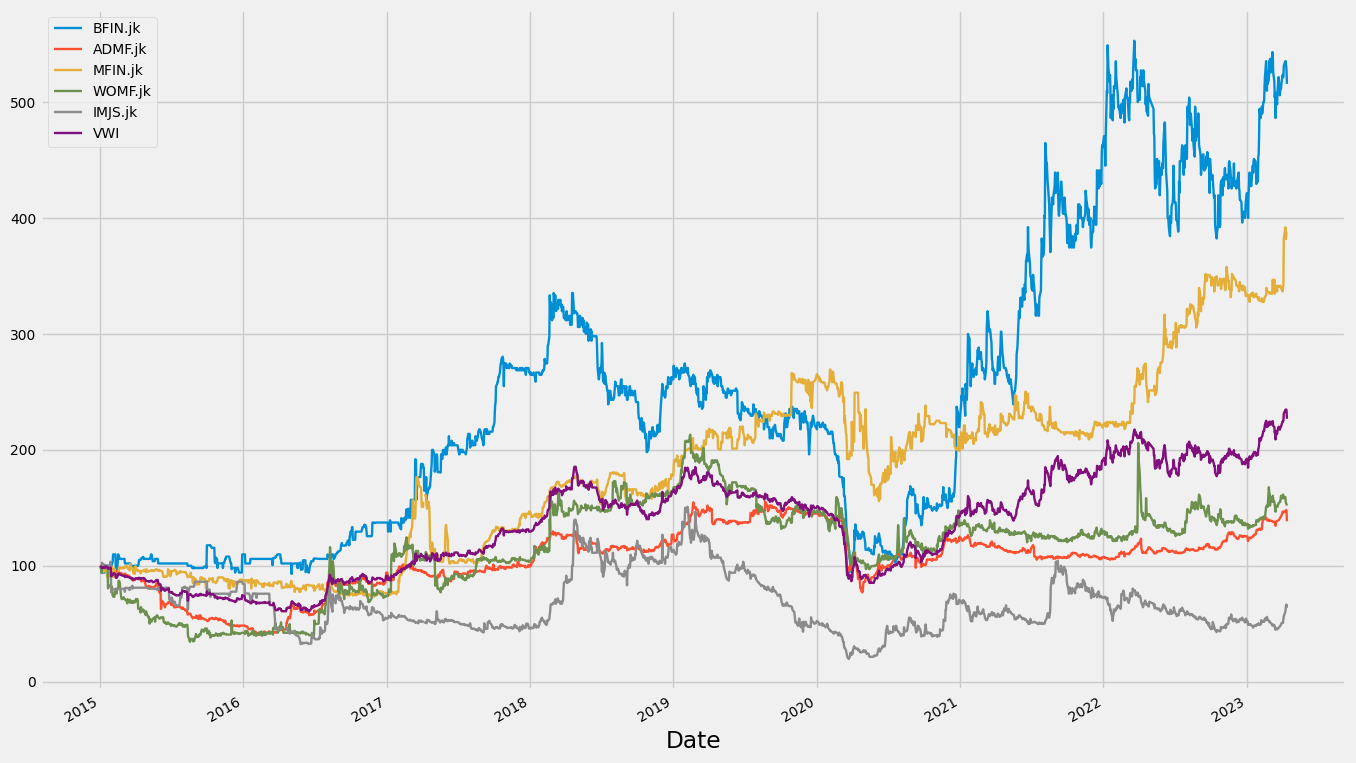

In [171]:
norm_lease.plot(figsize =(15,10), fontsize = 10, linewidth = 1.7)
plt.legend(fontsize =10)
plt.show()

# Appendix

## Complete Stock Information

In [137]:
yfinance.Ticker('ADMF.jk').info

{'address1': 'Millennium Centennial Center Building',
 'address2': 'Lt. 53-61, Jl. Gen. Sudirman Kav. 25 Setiabudi Rubber South',
 'city': 'Jakarta Selatan',
 'zip': '12920',
 'country': 'Indonesia',
 'phone': '62 21 3973 3232',
 'fax': '62 21 3973 4949',
 'website': 'https://adira.co.id',
 'industry': 'Credit Services',
 'sector': 'Financial Services',
 'longBusinessSummary': 'PT Adira Dinamika Multi Finance Tbk provides consumer financing, murabahah financing, and finance leasing services in Indonesia. It also provides sharia financing, which includes investment financing, working capital financing, multipurpose financing, and other financing business. The company was founded in 1990 and is headquartered in Jakarta Selatan, Indonesia. PT Adira Dinamika Multi Finance Tbk is a subsidiary of PT Bank Danamon Indonesia Tbk.',
 'fullTimeEmployees': 13863,
 'companyOfficers': [{'maxAge': 1,
   'name': 'Mr. I. Dewa Made Susila',
   'age': 52,
   'title': 'CFO, Chief of Strategy & Transformat